# Simple Linear Regression

__Aim__:

Predicting the percentage of marks that a student scores based upon the number of hours they have studied.

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
dataset = pd.read_csv("datasets_n_images/datasets_module_4/student_scores.csv")
dataset.shape

(25, 2)

In [61]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [62]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


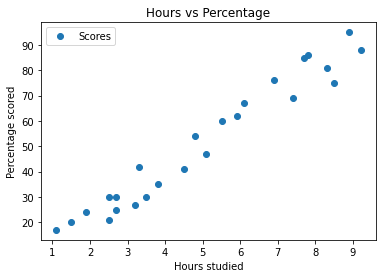

In [63]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show();

In [64]:
# prepare my data
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,1]

In [65]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [66]:
X.shape

(25, 1)

In [67]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [68]:
y.shape

(25,)

In [69]:
np.random.rand(3,2)

array([[0.87729688, 0.55921585],
       [0.15237013, 0.42906977],
       [0.89783224, 0.23229948]])

In [70]:
np.random.seed(0)
np.random.rand(3,2)

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411]])

In [71]:
np.random.seed(990)
np.random.rand(3,2)

array([[0.9806089 , 0.26989058],
       [0.09874419, 0.42379487],
       [0.11342195, 0.61825621]])

In [72]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [73]:
X_train.head()

,Hours
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7


In [74]:
y_train.head()

24    86
23    76
14    17
1     47
10    85
Name: Scores, dtype: int64

In [75]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [76]:
y_test.head()

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [77]:
X_train.shape

(18, 1)

In [78]:
X_test.shape

(7, 1)

In [79]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [80]:
print("Intercept:",regressor.intercept_)

Intercept: 1.932204253151646


In [81]:
print("Slope:",regressor.coef_)

Slope: [9.94167834]


In [82]:
9.94167834 * 5.5 + 1.932204253151646

56.611435123151644

In [83]:
9.91 * 6.9 + 2.018

70.397

In [84]:
# Predictions

y_pred = regressor.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [85]:
y_test

5     20
2     27
19    69
16    30
11    62
22    35
17    24
Name: Scores, dtype: int64

In [86]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


In [87]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


In [88]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.9367661043365055


In [89]:
type(float((metrics.r2_score(y_test, y_pred))))

float

In [90]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: 0.9156881391153407
